In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import glob
import cv2
from PIL import Image
import random

In [35]:
name = 'Path_Multicamera'
subdir = 'version_1'

source_dir = f'/home/adauton/Documents/Mestrado/Tese/Models/{name}/{subdir}/sim_results/'
# dest_dir = '/home/adauton/Documents/Mestrado/Tese/Models/Free_Multicamera/version_1/'

listdir = os.listdir(source_dir)

turns = []
num_rounds = 0
num_successful_rounds = 0
num_collisions = 0
num_missed_turns = 0
num_lane_invasions = 0
avg_lane_invasions = 0
num_distance_traveled = 0
avg_distance_traveled = 0
collision_locations = []
missed_turn_locations = []

for i, file in enumerate(listdir):
    path = os.path.join(source_dir, file)
    data = np.load(path, allow_pickle=True).tolist()
    if not data[-1] and not data[2] and not data[3]:
        os.remove(path)
        print(f'path {path} removed')

    turns.append(data)
    num_lane_invasions += data[0]
    num_distance_traveled += data[1]
    num_successful_rounds += 1 if data[5] is not None else 0

    if data[2] is not None:
        num_collisions += 1
        collision_locations.append(data[2])

    if data[3] is not None:
        num_missed_turns += 1
        missed_turn_locations.append(data[3])

    # simulator_results.append(data)
    # b = os.path.join(source_dir, str(counter + 1) + '.npz')
    # b = os.path.join(dest_dir, file)
    # os.rename(a, b)
    num_rounds += 1

print(f'Total Rounds: {num_rounds} \n')
print(f'Successful Rounds: {num_successful_rounds}')
print(f'Collisions: {num_collisions}')
print(f'Missed Turns: {num_missed_turns}')
print(f'Avg. Lane Invasions: {num_lane_invasions / num_rounds}')
print(f'Avg. Distance Traveled: {num_distance_traveled / num_rounds}')

Total Rounds: 100 

Successful Rounds: 98
Collisions: 2
Missed Turns: 0
Avg. Lane Invasions: 1.96
Avg. Distance Traveled: 814.44


In [36]:
bottom_left = (-10, 103)
bottom_right = (-10, 308)
top_left = (196, 103)
top_right = (196, 308)

corners = [bottom_right, bottom_left, top_right, top_left]

x = []
y = []
sizes = []
colors = []

for collision_location in collision_locations:
    x.append(collision_location[0])
    y.append(collision_location[1])
    sizes.append(400)
    colors.append('#DF2020')

for missed_turn_location in missed_turn_locations:
    x.append(missed_turn_location[0])
    y.append(missed_turn_location[1])
    sizes.append(400)
    colors.append('#2095DF')

for corner in corners:
    x.append(corner[0])
    y.append(corner[1])
    sizes.append(1)
    colors.append('black')

# size = len(x)
#
# for i in range(size):
#     if i < size - 4:
#         sizes.append(400)
#         colors.append('#DF2020')
#     else:
#         sizes.append(1)
#         colors.append('black')



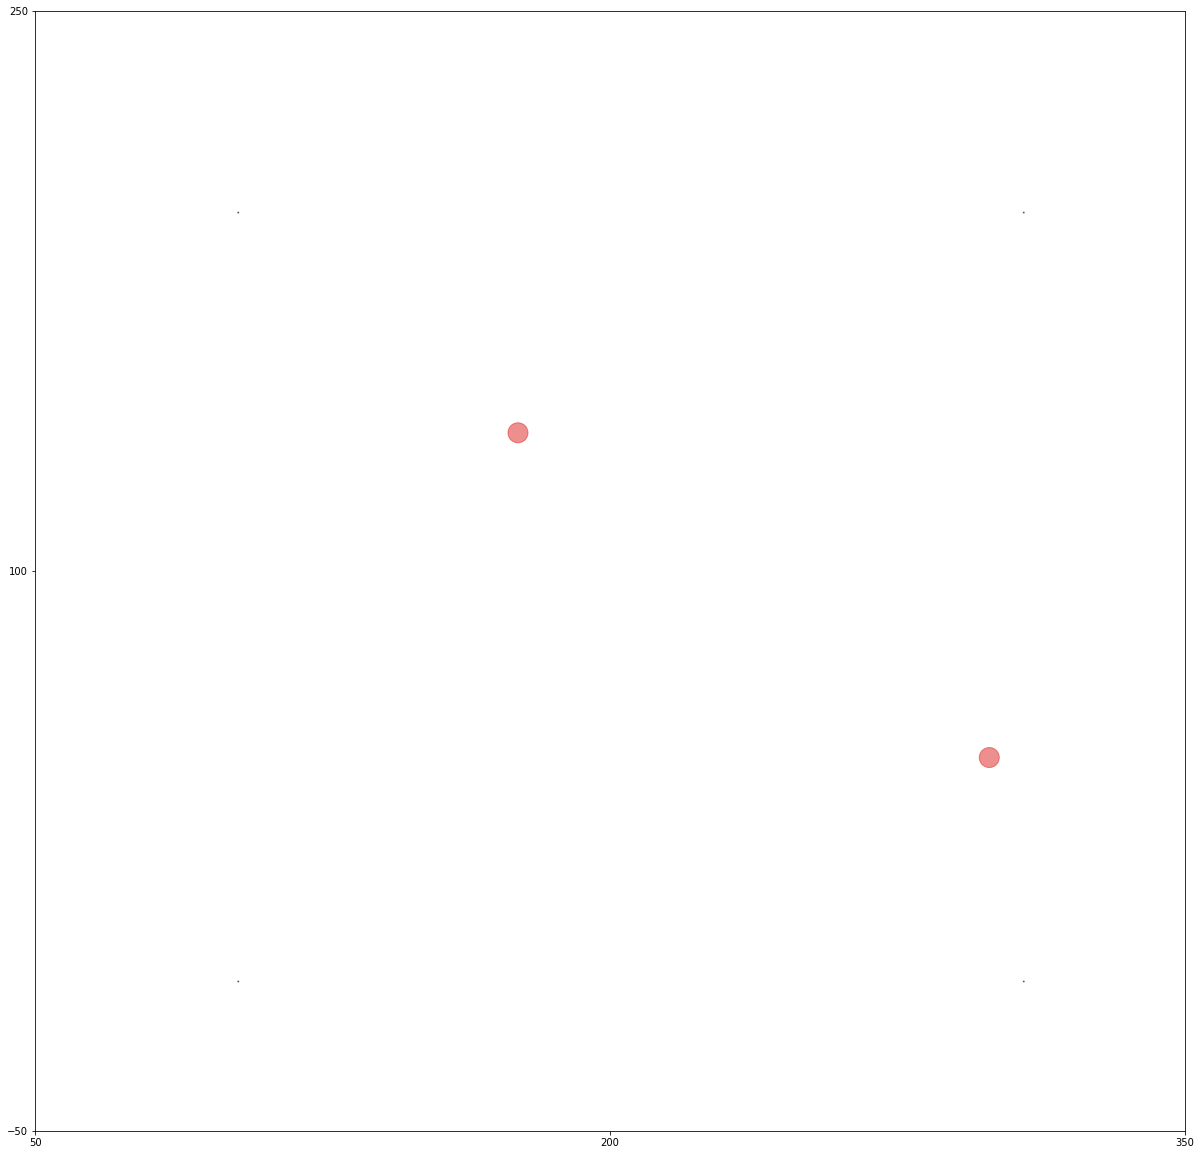

In [37]:

fig = plt.figure(figsize=(206 / 10, 206 / 10))
plt.scatter(y, x, s=sizes, color=colors, alpha=0.5)
plt.xticks([50, 200, 350])
plt.yticks([-50, 100, 250])
plt.show()

In [38]:
# fig.savefig('temp.png', transparent=True)

In [39]:
collision_locations.sort()
missed_turn_locations.sort()
for c in collision_locations:
    print(c)


(50, 299)
(137, 176)


In [40]:
collision_locations.sort()
missed_turn_locations.sort()
for i in missed_turn_locations:
    print(i)

In [41]:
for i in turns:
    if i[2] is not None:
        print(i)

[0, 254, (50, 299), None, 'carla.WeatherParameters.ClearSunset', None]
[0, 477, (137, 176), None, 'carla.WeatherParameters.WetSunset', None]
